# Course 1: *Manipulating Financial Data In Python*

## Reading and Plotting Stock Data
***

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.style.use('seaborn-darkgrid')

In the stock market data for stocks you'll see a date, the open price, the highest price of the day, the lowest price of the date, the close price, the volume, and the adjusted close, which takes into is the close price adjusted for things such as stock splits and dividend payments. 

In [76]:
tickers = ['AAPL','SPY','MSFT']
info = yf.Tickers(' '.join(tickers))
history = pd.DataFrame(info.history(period='10y'))

[*********************100%***********************]  3 of 3 completed


In [10]:
history.columns = ['_'.join(tup) for tup in history.columns.values]
history.head()

,Close_AAPL,Close_MSFT,Close_SPY,Dividends_AAPL,Dividends_MSFT,Dividends_SPY,High_AAPL,High_MSFT,High_SPY,Low_AAPL,...,Low_SPY,Open_AAPL,Open_MSFT,Open_SPY,Stock Splits_AAPL,Stock Splits_MSFT,Stock Splits_SPY,Volume_AAPL,Volume_MSFT,Volume_SPY
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-21,10.437879,20.211607,106.437080,0.0,0.0,0.0,10.451414,20.411090,106.658576,10.313596,...,105.994064,10.336054,20.091918,106.117130,0.0,0,0,409402000,46878100,153992600
2011-03-22,10.496328,20.187656,106.067871,0.0,0.0,0.0,10.540013,20.315325,106.560108,10.432957,...,105.969429,10.538167,20.187656,106.420644,0.0,0,0,325922800,30895600,129538600
2011-03-23,10.434494,20.379171,106.371429,0.0,0.0,0.0,10.466179,20.435026,106.650358,10.334821,...,105.272113,10.437262,20.131812,105.772538,0.0,0,0,372996400,43969000,148603100
2011-03-24,10.612308,20.594608,107.388695,0.0,0.0,0.0,10.643994,20.642485,107.544570,10.424346,...,106.379622,10.516327,20.427043,106.978501,0.0,0,0,404712000,38696700,159129800
2011-03-25,10.814417,20.442993,107.716858,0.0,0.0,0.0,10.830413,20.706310,108.184472,10.675368,...,107.380496,10.707669,20.690351,107.667637,0.0,0,0,448910000,57029800,155642800


In [68]:
history.columns

Index(['Close_AAPL', 'Close_MSFT', 'Close_SPY', 'Dividends_AAPL',
       'Dividends_MSFT', 'Dividends_SPY', 'High_AAPL', 'High_MSFT', 'High_SPY',
       'Low_AAPL', 'Low_MSFT', 'Low_SPY', 'Open_AAPL', 'Open_MSFT', 'Open_SPY',
       'Stock Splits_AAPL', 'Stock Splits_MSFT', 'Stock Splits_SPY',
       'Volume_AAPL', 'Volume_MSFT', 'Volume_SPY'],
      dtype='object')

### Normalizing and Plotting
It is important to normalize the data so that we can compare the stocks in equal grounds. To do this we choose the first observation values and normalize using it as follows:

$$ \text{Normalized Values} = \frac{Values}{\text{first day values}}$$

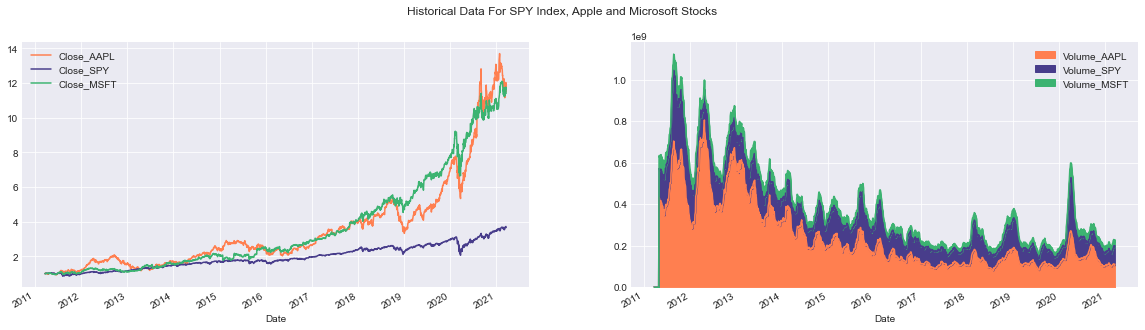

In [67]:
colors = ['coral', 'darkslateblue', 'mediumseagreen']
ax1 = plt.subplot(1,2,1)

# Normalizing Values
(history[['Close_AAPL','Close_SPY','Close_MSFT']]/history.loc[history.index.min(),['Close_AAPL','Close_SPY','Close_MSFT']])\
.plot(ax=ax1,figsize=(20,5),color= colors)
ax2 = plt.subplot(1,2,2)
history[['Volume_AAPL','Volume_SPY','Volume_MSFT']].rolling(30).mean().plot(kind='area',ax=ax2,figsize=(20,5),alpha=1,color=colors)
#history['Volume_MSFT'].plot(kind='area',ax=ax2,figsize=(20,5),alpha=1,color=colors)
plt.suptitle('Historical Data For SPY Index, Apple and Microsoft Stocks');

An important thing to consider is that stocks are not traded all days in the NYSE or any market. The trading days of a year are around 252.

In [4]:
# ------------ Modularization of Code--------------------------
# 1. Libraries needed
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.style.use('seaborn-darkgrid')

# 2. Functions

def prepare_data(tickers=['SPY','AAPL','GOOG','MSFT'],period='5y'):
    '''This functions takes the data from Yahoo Finance from a set of tickers
    and prepares it in a dataframe
    INPUTS:
        tickers (list): a list of all the tickers that you want to analize
        period (string): a string with the period of the data you want to
                        analize
    OUTPUTS:
        df (pandas Data Frame): Data frame with the data required
    '''
    if len(tickers)>1:
        try:
            df_information = yf.Tickers(' '.join(tickers))
            df = pd.DataFrame(df_information.history(period=period))
            df.columns = ['_'.join(tup) for tup in df.columns.values]
            return df
        except:
            base_info = yf.Ticker(tickers[0])
            base_df = pd.DataFrame(base_info.history(period=period))
            base_df.columns = [col+'_'+tickers[0] for col in base_df.columns.values]
            
            for ticker in tickers[1:]:
                temp_info = yf.Ticker(ticker)
                temp_df = pd.DataFrame(temp_info.history(period=period))
                temp_df.columns = [col+'_'+ticker for col in temp_df.columns.values]
                base_df = base_df.join(temp_df,how='outer')
            return base_df
    
    else:
        info = yf.Ticker(tickers[0])
        df = pd.DataFrame(info.history(period=period))
        df.columns = [column+'_'+tickers[0] for column in df.columns]
        return df

def plot_data(df,tickers=['SPY','AAPL','GOOG','MSFT'],
              column = 'Close',kind='line',title='Historical Close Price Data',
              ylabel='Close Prices',xlabel='Date',**kwargs):
    '''This function plots the data in the dataframe according to the column given
    assuming that the index of the dataframe is the x axis of the plot
    INPUTS:
        df (pandas dataframe): dataframe with the information to be plotted
        tickers (list): list of the tickers to be plotted
        column (string): the kind of data to be plotted
    OUTPUTS:
        None
    '''
    columns_interest = [column+'_'+ticker for ticker in tickers]
    ax = df[columns_interest].plot(kind=kind,title=title,**kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return ax
    
                
            
# Class
class FinancialData(object):
    '''This is a class stores information about financial data from ticker or 
    list of tickers, that can be prepared as a data frame and plotted.'''
    
    def __init__(self,tickers=[],period='max'):
        
        self.tickers = tickers
        self.period = period
    
    def prepare_data(self):
        '''This functions takes the data from Yahoo Finance from a set of tickers
        and prepares it in a dataframe
        INPUTS:
            tickers (list): a list of all the tickers that you want to analize
            period (string): a string with the period of the data you want to
                            analize
        OUTPUTS:
            df (pandas Data Frame): Data frame with the data required
        '''
        tickers = self.tickers
        period = self.period
        if len(tickers)>1:
            try:
                df_information = yf.Tickers(' '.join(tickers))
                df = pd.DataFrame(df_information.history(period=period))
                df.columns = ['_'.join(tup) for tup in df.columns.values]
                self.df = df
                return df
            except:
                base_info = yf.Ticker(tickers[0])
                base_df = pd.DataFrame(base_info.history(period=period))
                base_df.columns = [col+'_'+tickers[0] for col in base_df.columns.values]

                for ticker in tickers[1:]:
                    temp_info = yf.Ticker(ticker)
                    temp_df = pd.DataFrame(temp_info.history(period=period))
                    temp_df.columns = [col+'_'+ticker for col in temp_df.columns.values]
                    base_df = base_df.join(temp_df,how='outer')
                self.df = df
                return base_df

        else:
            info = yf.Ticker(tickers[0])
            df = pd.DataFrame(info.history(period=period))
            df.columns = [column+'_'+tickers[0] for column in df.columns]
            self.df = df
            return df
        
    def plot_data(self,column = 'Close',kind='line', 
                  title='Historical Close Price Data',ylabel='Close Prices', 
                  xlabel='Date',**kwargs):
        '''This function plots the data in the dataframe according to the column given
        assuming that the index of the dataframe is the x axis of the plot
        INPUTS:
            df (pandas dataframe): dataframe with the information to be plotted
            tickers (list): list of the tickers to be plotted
            column (string): the kind of data to be plotted
        OUTPUTS:
            None
        '''
        df = self.df
        tickers = self.tickers
        columns_interest = [column+'_'+ticker for ticker in tickers]
        df[columns_interest].plot(kind=kind,title=title,**kwargs)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    
    def get_tickers(self):
        '''This function retreives the ticker attribute from the object instance
        '''
        return self.tickers
    def add_ticker(self,ticker):
        '''Adds one ticker to the list of tickers and prepares again the data
        INPUTS:
            ticker (string): name of the ticker added
        OUTPUTS:
            df (pandas DataFrame): dataframe with the information for all tickers
            
        '''
        self.tickers.append(ticker)
        self.prepare_data()
    

## The Power of Numpy
***
You can transform the pandas dataframe into numpy array with the dataframe's values attribute:

```python
df.values
```


In [2]:
# Empty array

np.empty((2,2,2))

array([[[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 1.11461210e-320],
        [4.23079447e-307, 2.12199579e-314]]])

In [3]:
np.ones((3,4),dtype=np.int_)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

### Generating Random Numbers

In [4]:
# Uniform Distribution Between 0-1
np.random.random((3,3))

array([[0.32325973, 0.51599754, 0.98826882],
       [0.44181575, 0.78526823, 0.15029207],
       [0.49705801, 0.77948895, 0.58875742]])

In [5]:
np.random.rand(3,3)

array([[0.28334021, 0.63304372, 0.44916754],
       [0.874534  , 0.79864784, 0.28497148],
       [0.33016149, 0.78766406, 0.09482154]])

In [6]:
# Normal Distribution: mean=3 and sd=4
np.random.normal(loc=3,scale=4,size=(3,3,2))

array([[[  9.88644055,   4.35379826],
        [  3.95953109,  -4.0575919 ],
        [  6.78268362,   2.47744966]],

       [[  9.00606853,   6.23664852],
        [  6.90060368, -10.25505257],
        [  2.70417378,   4.86988088]],

       [[  5.36033961,   7.0094723 ],
        [  1.51785233,  -0.74632205],
        [  1.66305871,   1.5339755 ]]])

Random Integers generator

In [7]:
print(np.random.randint(10))  # a single integer in [0,10)
print(np.random.randint(0,10)) # the same, but with [low, high) explicit
print(np.random.randint(0,10,size=5)) # 5 rnadom integers as a 1D array
print(np.random.randint(0,10,size=(2,3))) # 2x3 array of random integers

4
1
[9 5 1 3 2]
[[6 1 1]
 [1 1 9]]


In [8]:
array_test = np.random.randint(0,100,size=(3,2,5))
print('Shape of the array',array_test.shape)
print('Number of dimensions of the array',array_test.ndim)
print('Number of elements in the array',array_test.size)
print('Data type of elements in the array',array_test.dtype)

Shape of the array (3, 2, 5)
Number of dimensions of the array 3
Number of elements in the array 30
Data type of elements in the array int32


### Operations with arrays

In [9]:
array = np.random.randint(0,10,(5,10))
print('Array:\n',array)
print('\nThe sum of all elements inside the array:\n',array.sum())
print('\nThe sum by rows:',array.sum(axis=0))
print('\nThe sum by columns:\n',array.sum(axis=1))
print('\nMaximum value per row:\n',array.max(axis=0))
print('\nMinimum value:\n',array.min())
print('\nMean value:\n',array.mean())

Array:
 [[1 4 9 4 4 4 1 1 9 7]
 [4 7 9 5 1 3 0 4 7 9]
 [8 3 9 4 5 5 7 0 2 8]
 [5 6 6 5 9 8 0 8 8 5]
 [1 2 5 0 8 9 3 0 0 5]]

The sum of all elements inside the array:
 237

The sum by rows: [19 22 38 18 27 29 11 13 26 34]

The sum by columns:
 [44 49 51 60 33]

Maximum value per row:
 [8 7 9 5 9 9 7 8 9 9]

Minimum value:
 0

Mean value:
 4.74


### Locating the maximum value

In [10]:
array.argmax(axis=1)

array([2, 2, 2, 4, 5], dtype=int64)

### Timing Python Operations

In [11]:
import time 
def manual_mean(array):
    '''Compute mean (average) of all elements in the given 2D array.'''
    s = 0
    for i in range(0,array.shape[0]):
        for j in range(0,array.shape[1]):
            s += array[i,j]
    return s/array.size


In [12]:
array = np.random.random((1000,1000))
t1 = time.time()
print(manual_mean(array))
t2 = time.time()
print('The time this operation took with doble for loop is: {}'.format(t2-t1))

0.5002988986644854
The time this operation took with doble for loop is: 0.30940723419189453


In [13]:
t1 = time.time()
print(array.mean())
t2 = time.time()
print('The time this operation took with Numpy function is: {}'.format(t2-t1))

0.5002988986644838
The time this operation took with Numpy function is: 0.0019986629486083984


In [16]:
array = np.random.random((3,3,3))
print(array)
array[0,0,0]

[[[0.97826322 0.1011398  0.41672169]
  [0.56012667 0.77264483 0.69142513]
  [0.81750053 0.33058743 0.75150758]]

 [[0.50667922 0.90283534 0.51388241]
  [0.99947346 0.0039934  0.76414423]
  [0.64396944 0.9368836  0.33959176]]

 [[0.37981604 0.303617   0.48395339]
  [0.48984756 0.95356302 0.19647438]
  [0.11587259 0.19342259 0.31898468]]]


0.9782632214556739

In [17]:
# Slice n:m:t specifies a range that starts at n, and stops before m, jumping
# by t
array = np.random.randint(0,9,(4,4))
print(array)
print(array[0:4:2,0:4:2])

[[6 8 4 7]
 [3 2 0 7]
 [4 0 0 3]
 [6 8 6 4]]
[[6 4]
 [4 0]]


## Statistical Analysis of time series
***
In this lesson we'll learn a convinient way to comnpute various statistics on a dataframe, from the mean, meadian, to the rolling mean, rollint standard deviation, etc. 

Specifically, you will compute: 
+ Bollinger bands: a way of quantifying how far stock price has deviated from some norm
+ Daily returns: day-to-day change in stock price

In [22]:
tickers = ['SPY','AAPL','BTC-USD','ETH-USD']
df = prepare_data(tickers)
df.head()

[*********************100%***********************]  4 of 4 completed


,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Dividends_SPY,Stock Splits_SPY,Open_AAPL,High_AAPL,Low_AAPL,...,Volume_BTC-USD,Dividends_BTC-USD,Stock Splits_BTC-USD,Open_ETH-USD,High_ETH-USD,Low_ETH-USD,Close_ETH-USD,Volume_ETH-USD,Dividends_ETH-USD,Stock Splits_ETH-USD
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44650400.0,0.0,0.0,10.7679,11.1808,10.5892,10.9740,9425480.0,0.0,0.0
2016-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71229400.0,0.0,0.0,10.9861,11.0542,10.1121,10.4192,16744800.0,0.0,0.0
2016-03-28,185.212051,185.439461,184.393380,184.875488,62408200.0,0.0,0.0,24.647880,24.692061,24.429304,...,68522800.0,0.0,0.0,10.4314,11.8613,10.4075,11.6656,23188300.0,0.0,0.0
2016-03-29,184.438878,186.703890,184.111407,186.585632,92922900.0,0.0,0.0,24.389775,25.064105,24.387450,...,75411504.0,0.0,0.0,11.7527,11.9136,11.3498,11.6564,17684200.0,0.0,0.0
2016-03-30,187.659026,188.177514,187.013174,187.404327,86365300.0,0.0,0.0,25.264081,25.675653,25.252453,...,66034100.0,0.0,0.0,11.6053,12.1785,11.4692,11.9529,19351200.0,0.0,0.0


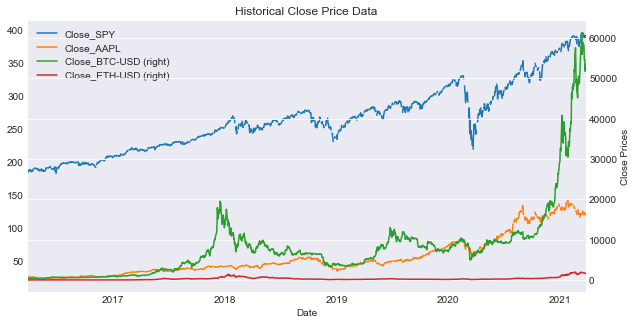

In [26]:
plot_data(df,tickers,figsize=(10,5),secondary_y=['Close_BTC-USD','Close_ETH-USD'])

In [30]:
df[['Close_'+ticker for ticker in tickers]].agg([min,max,'mean','median','std'])

,Close_SPY,Close_AAPL,Close_BTC-USD,Close_ETH-USD
min,182.508606,21.134403,414.816010,6.821660
max,395.963135,142.946396,61243.085938,1960.164795
mean,265.220903,55.358002,8181.136384,311.884900
median,261.273865,44.998276,6753.120117,211.186554
std,50.859365,30.392099,9467.445500,356.253262


### Rolling Statistics

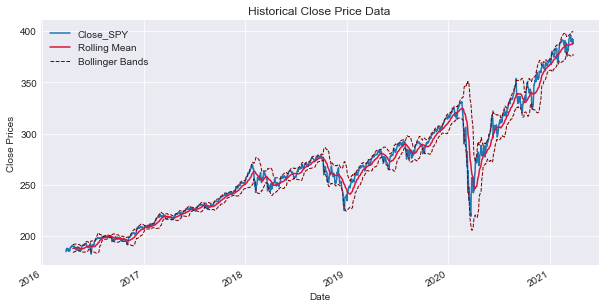

In [63]:
spy = prepare_data(['SPY'])
ax = plot_data(spy,['SPY'],figsize=(10,5),label='SPY Close')
spy['Close_SPY'].rolling(20).mean().plot(ax=ax,label='Rolling Mean'
                                         ,color='crimson')
(spy['Close_SPY'].rolling(20).mean()+2*spy['Close_SPY'].rolling(20).std())\
    .plot(linestyle='--',color='maroon',linewidth=1,ax=ax,label='Bollinger Bands')
(spy['Close_SPY'].rolling(20).mean()-2*spy['Close_SPY'].rolling(20).std())\
    .plot(linestyle='--',color='maroon',linewidth=1,ax=ax,label='')
ax.set_xlabel('Date')
ax.legend(loc='upper left');

The rolling mean behaviour of the series is often thought of as the true underlying price of the asset. Thus, when the rolling average is crossed by the true price, which could be a sign to buy or to sell. To determine whether it is time to buy or sell, you should use the rolling standard deviation.

**The Bollinger Bands** are just the rolling mean plus 2 standard deviations ($2\sigma$) as the upper band and the lower band is the rolling mean minus 2 sigmas. 

### Daily Returns
Daily returns are an important statistics used in financial analysis, which measures the change in prices in a daily basis, having:

$$\text{Daily Returns}_t= \frac{\text{Return}_t}{\text{Return}_{t-1}}-1$$

Text(2017-01, 0.05, '$\\mu$ = 0.001')

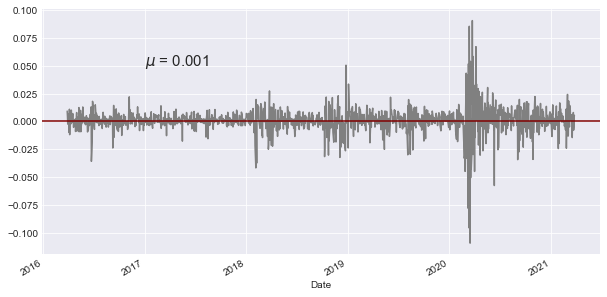

In [72]:
ax = spy['Close_SPY'].pct_change().plot(color='gray',figsize=(10,5))
mean= spy['Close_SPY'].pct_change().mean()
ax.axhline(mean,color='maroon')
ax.text('2017-01',0.050,'$\mu$ = {}'.format(round(mean,3)),fontsize=15)

<AxesSubplot:xlabel='Date'>

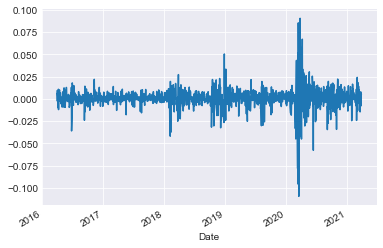

In [74]:
# Second method
(spy['Close_SPY']/spy['Close_SPY'].shift(1)-1).plot()

### Cumulative Returns
This is another very important the cumulative returns, where you compare the returns with respect to a reference point:

<AxesSubplot:xlabel='Date'>

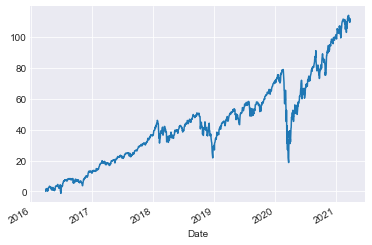

In [77]:
(spy['Close_SPY']/spy['Close_SPY'].iloc[0]*100-100).plot()

In [87]:
# New functions
def rolling_statistics(df,column='Close',ticker='SPY',function=mean,
                      window=20,plot=True,bollinger=False,
                       rolling_color='crimson',roll_linewidth=1.5,**kwargs):
    '''This functions extracts the rolling statistics from a time series
    INPUTS:
        df (pandas Data Frame): data frame with the financial data, that contains
            both the column and ticker specified in the function
        column (string): the column that you want to get the rolling function of
        ticker (str): the ticker from which you want to know the information
        function: function that will be rolled through the time series
        window (int): the window of the rolling data
    OUTPUTS:
        rolled (pandas series): a series with the rolling statistics specified
        
    '''
    series = df[column+'_'+ticker].rolling(window).mean()
    if plot:
        ax = df[column+'_'+ticker].plot(label=column+' '+ticker,**kwargs)
        series.plot(ax=ax,color=rolling_color,linewidth=roll_linewidth)
        if bollinger:
            (series+(2*df[column+'_'+ticker]).rolling(window).std()).plot(linestyle='--',
                                                                      color='darkgreen',
                                                                       linewidth=1,
                                                                       ax=ax,
                                                                       label=
                                                                       'Bollinger')
            (series-(2*df[column+'_'+ticker]).rolling(window).std()).plot(linestyle='--',
                                                                      color='darkgreen',
                                                                       linewidth=1,
                                                                       ax=ax,
                                                                       label='')
        ax.legend();
    return series

def find_returns(df,columns,tickers,return_window=1,plot=False,**kwargs):
    '''This function finds the returns for a set of tickers and prices
    INPUTS:
        df (pandas Data Frame): dataframe containing the time series information
        columns (list or string): columns to find the returns
        tickers (list or string): tickers to be analyzed
        return_window (int): the window from which to get the returns, default 
        daily
    
    OUTPUTS:
        returns (pandas series or data frame): pandas data structure with the 
        returns
    '''
    if isinstance(columns,list) and isinstance(tickers,list):
        col_names = [column+'_'+ticker for ticker in tickers for column in columns]
    elif isinstance(columns,list):
        col_names = [column+'_'+tickers for column in columns]
    elif isinstance(tickers,list):
        col_names = [columns+'_'+ticker for ticker in tickers]
    else:
        col_names = columns+'_'+tickers
    returns = df[col_names].pct_change(return_window)
    if plot:
        returns.plot(**kwargs)
    return returns
# Class
class FinancialData(object):
    '''This is a class stores information about financial data from ticker or 
    list of tickers, that can be prepared as a data frame and plotted.'''
    
    def __init__(self,tickers=[],period='max'):
        
        self.tickers = tickers
        self.period = period
    
    def prepare_data(self,fillna=False):
        '''This functions takes the data from Yahoo Finance from a set of tickers
        and prepares it in a dataframe
        INPUTS:
            tickers (list): a list of all the tickers that you want to analize
            period (string): a string with the period of the data you want to
                            analize
        OUTPUTS:
            df (pandas Data Frame): Data frame with the data required
        '''
        tickers = self.tickers
        period = self.period
        if len(tickers)>1:
            try:
                df_information = yf.Tickers(' '.join(tickers))
                df = pd.DataFrame(df_information.history(period=period))
                df.columns = ['_'.join(tup) for tup in df.columns.values]
                if fillna:
                    df.fillna(method='ffill',inplace=True)
                    df.fillna(method='bfill',inplace=True)
                self.df = df
                return self.df
            except:
                base_info = yf.Ticker(tickers[0])
                base_df = pd.DataFrame(base_info.history(period=period))
                base_df.columns = [col+'_'+tickers[0] for col in base_df.columns.values]

                for ticker in tickers[1:]:
                    temp_info = yf.Ticker(ticker)
                    temp_df = pd.DataFrame(temp_info.history(period=period))
                    temp_df.columns = [col+'_'+ticker for col in temp_df.columns.values]
                    base_df = base_df.join(temp_df,how='outer')
                if fillna:
                    base_df.fillna(method='ffill',inplace=True)
                    base_df.fillna(method='bfill',inplace=True)
                self.df = base_df
                return self.df

        else:
            info = yf.Ticker(tickers[0])
            df = pd.DataFrame(info.history(period=period))
            df.columns = [column+'_'+tickers[0] for column in df.columns]
            if fillna:
                    df.fillna(method='ffill',inplace=True)
                    df.fillna(method='bfill',inplace=True)
            self.df = df
            return df
        
    def plot_data(self,column = 'Close',kind='line', 
                  title='Historical Close Price Data',ylabel='Close Prices', 
                  xlabel='Date',**kwargs):
        '''This function plots the data in the dataframe according to the column given
        assuming that the index of the dataframe is the x axis of the plot
        INPUTS:
            df (pandas dataframe): dataframe with the information to be plotted
            tickers (list): list of the tickers to be plotted
            column (string): the kind of data to be plotted
        OUTPUTS:
            None
        '''
        df = self.df
        tickers = self.tickers
        columns_interest = [column+'_'+ticker for ticker in tickers]
        df[columns_interest].plot(kind=kind,title=title,**kwargs)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    
    def rolling_statistics(self,column='Close',ticker='SPY',function=mean,
                      window=20,plot=False,bollinger=False,
                       rolling_color='crimson',roll_linewidth=1.5,**kwargs):
        '''This functions extracts the rolling statistics from a time series, and
        can plot the rolling window with the data, adding the Bollinger bands.
        
        INPUTS:
            df (pandas Data Frame): data frame with the financial data, that contains
                both the column and ticker specified in the function
            column (string): the column that you want to get the rolling function of
            ticker (str): the ticker from which you want to know the information
            function: function that will be rolled through the time series
            window (int): the window of the rolling data
            
        OUTPUTS:
            rolled (pandas series): a series with the rolling statistics specified

        '''
        df = self.df
        series = df[column+'_'+ticker].rolling(window).mean()
        if plot:
            ax = df[column+'_'+ticker].plot(label=column+' '+ticker,**kwargs)
            series.plot(ax=ax,color=rolling_color,linewidth=roll_linewidth)
            if bollinger:
                (series+(2*df[column+'_'+ticker]).rolling(window).std()).plot(linestyle='--',
                                                                          color='darkgreen',
                                                                           linewidth=1,
                                                                           ax=ax,
                                                                           label=
                                                                           'Bollinger')
                (series-(2*df[column+'_'+ticker]).rolling(window).std()).plot(linestyle='--',
                                                                          color='darkgreen',
                                                                           linewidth=1,
                                                                           ax=ax,
                                                                           label='')
            ax.legend();
        return series
    
    def find_returns(self,columns,tickers,return_window=1,plot=False,**kwargs):
        '''This function finds the returns for a set of tickers and prices
        INPUTS:
            df (pandas Data Frame): dataframe containing the time series information
            columns (list or string): columns to find the returns
            tickers (list or string): tickers to be analyzed
            return_window (int): the window from which to get the returns, default 
            daily

        OUTPUTS:
            returns (pandas series or data frame): pandas data structure with the 
            returns
        '''
        df = self.df
        if isinstance(columns,list) and isinstance(tickers,list):
            col_names = [column+'_'+ticker for ticker in tickers for column in columns]
        elif isinstance(columns,list):
            col_names = [column+'_'+tickers for column in columns]
        elif isinstance(tickers,list):
            col_names = [columns+'_'+ticker for ticker in tickers]
        else:
            col_names = columns+'_'+tickers
        returns = df[col_names].pct_change(return_window)
        if plot:
            returns.plot(**kwargs)
        return returns

    def get_tickers(self):
        '''This function retreives the ticker attribute from the object instance
        '''
        return self.tickers
    
    def add_ticker(self,ticker):
        '''Adds one ticker to the list of tickers and prepares again the data
        INPUTS:
            ticker (string): name of the ticker added
        OUTPUTS:
            df (pandas DataFrame): dataframe with the information for all tickers
            
        '''
        self.tickers.append(ticker)
        self.prepare_data()

## Incomplete Data
***
Eventhough people think the financial data is perfectly recorded minute by minute, with no gaps or missing data points, the reality is that the data is usualy an amalgamiation of various sources. 

Another important thing to consider is that not all financial prodicts are traded everyday; some products come into existence between the analyzed period, or trade some days others don't, or don't trade when others do. Or may be there is simply missing data due to error or lack or liquidity. 

### Filling missing data
When we encounter missing data in a time series, the we shouldn't interpolate the data, because it uses data from the future to approximate data from the past, which can could alter the functioning of our models.

A better way to deal with this is by filling forward the data first, so that the price remains the same until a new price of data point is seen. If you have missing data from the past, and you need to fill that data the best thing you can do is fill backwards, because it is the closest data point you know. So:
1. Fill forward
2. Fill backard

```python

# Fill forward:
df.fillna(method='ffill')

# Fill backward:
df.fillna(method='bfill')
```

## Histograms and Scatter plots
***
Individual daily returns by themselves are not very informative, it is necesary to compare them among different stocks. One way to do this is by using histograms to plot the distribution of the returns of differnt stocks:

[*********************100%***********************]  4 of 4 completed


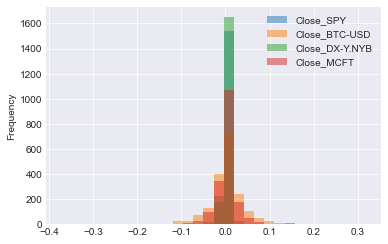

In [21]:
tickers = ['SPY','BTC-USD','DX-Y.NYB','MCFT']
financial_data = FinancialData(tickers,period='5y')
financial_df = financial_data.prepare_data()
returns_df = financial_data.find_returns('Close',tickers,plot=True,kind='hist',alpha=0.5,bins=30)

Text(0.5, 0.98, 'Return Distribution Close price')

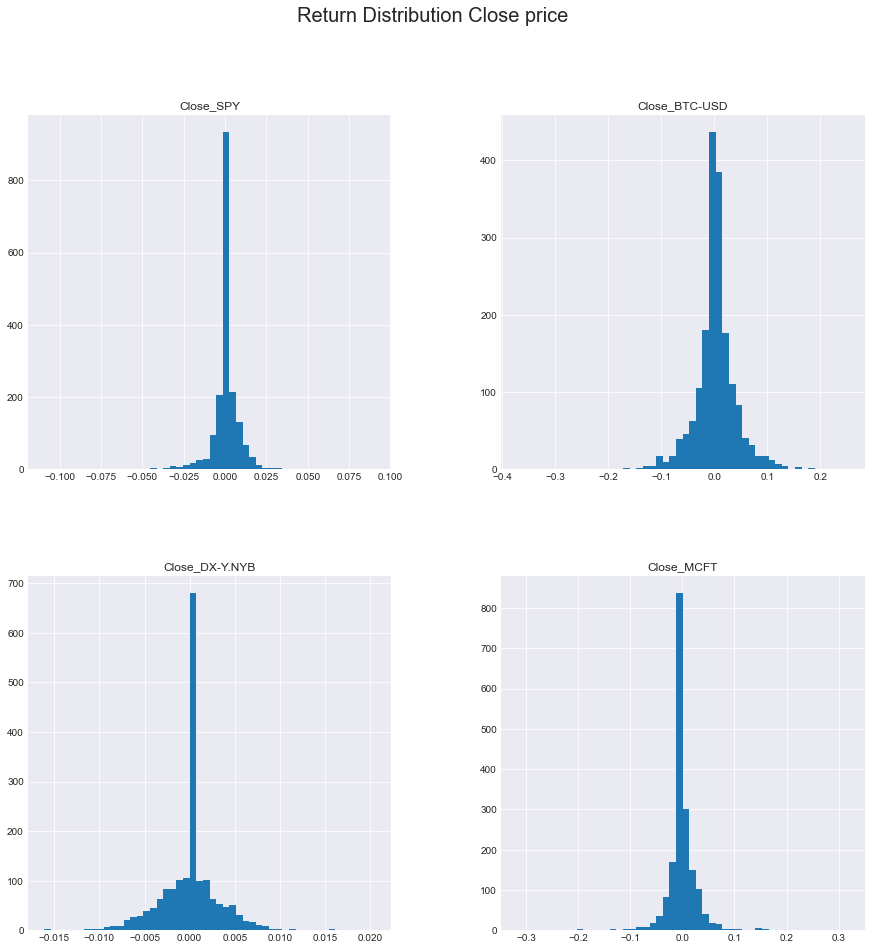

In [22]:
returns_df.hist(bins=50,figsize=(15,15))
plt.suptitle('Return Distribution Close price',fontsize=20)

Now that we have the histograms with the distribution of the different returns, we can extract some important statistics from them, such as the mean, the stadard deviation (the average deviation from the mean), kurtosis (how much our distributions are different from a normal distribution, which can tell us whether there are fat tails, which means that there are more frequent extreme values in relation to a Normal Distribution; on the other hand, negative values signal the lack of extreme values in the tails in relation to a normal distribution). 

In [23]:
returns_df.agg(['mean','std','kurtosis'])

,Close_SPY,Close_BTC-USD,Close_DX-Y.NYB,Close_MCFT
mean,0.000466,0.003492,-0.000013,0.000992
std,0.009809,0.040107,0.003222,0.029339
kurtosis,28.431177,8.039686,3.778495,24.542597


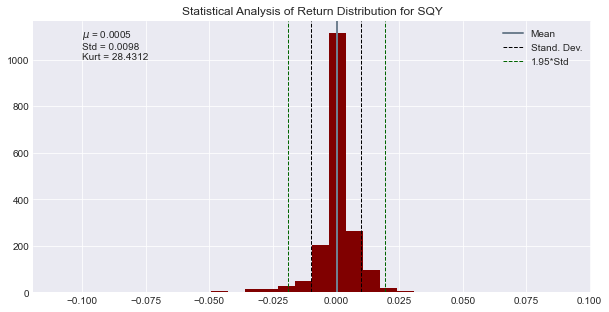

In [38]:
statistics = returns_df['Close_SPY'].agg(['mean','std','kurtosis'])
ax = returns_df['Close_SPY'].hist(bins=30,color='maroon',figsize=(10,5))
ax.axvline(statistics['mean'],color='slategray',
           linewidth=2,label='Mean')
ax.axvline(statistics['std'],color='black',linewidth=1,linestyle='dashed',
          label='Stand. Dev.')
ax.axvline(-statistics['std'],color='black',linewidth=1,linestyle='dashed',
          label='')
ax.axvline(1.95*statistics['std'],color='darkgreen',linewidth=1,linestyle='dashed',
          label='1.95*Std')
ax.axvline(-1.95*statistics['std'],color='darkgreen',linewidth=1,linestyle='dashed',
          label='')
ax.text(-0.1,1000,'$\mu$ = {} \nStd = {} \nKurt = {}'.format(round(statistics['mean'],4),
                                                            round(statistics['std'],4),
                                                            round(statistics['kurtosis'],4)))
plt.legend()
plt.title('Statistical Analysis of Return Distribution for SQY');

Another way to plot returns is to make a scatter plot of two stock's returns, so that to find a relation among them:

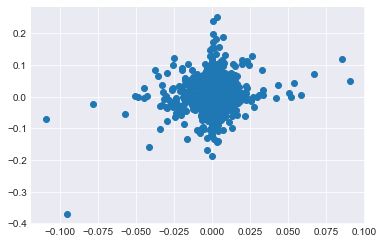

In [42]:
plt.scatter(returns_df['Close_SPY'],returns_df['Close_BTC-USD'])

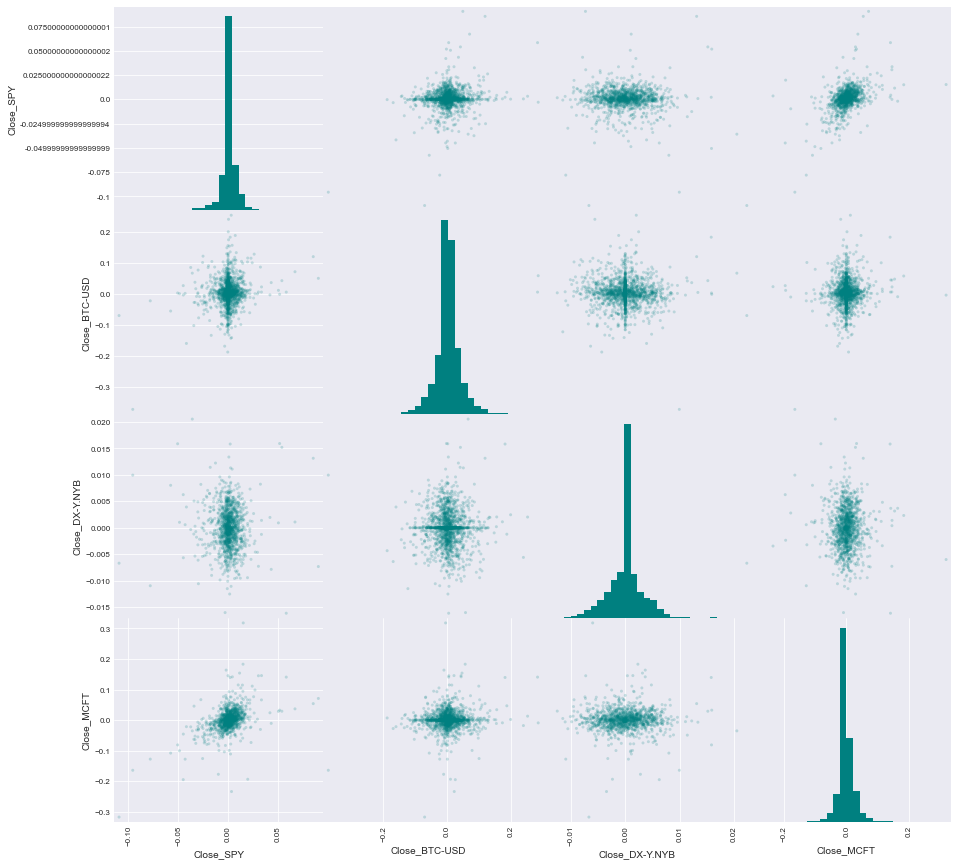

In [56]:
from pandas.plotting import scatter_matrix
scatter_matrix(returns_df,figsize=(15,15),diagonal='hist',color='teal',hist_kwds={'bins':30,'color':'teal'},alpha=0.2);

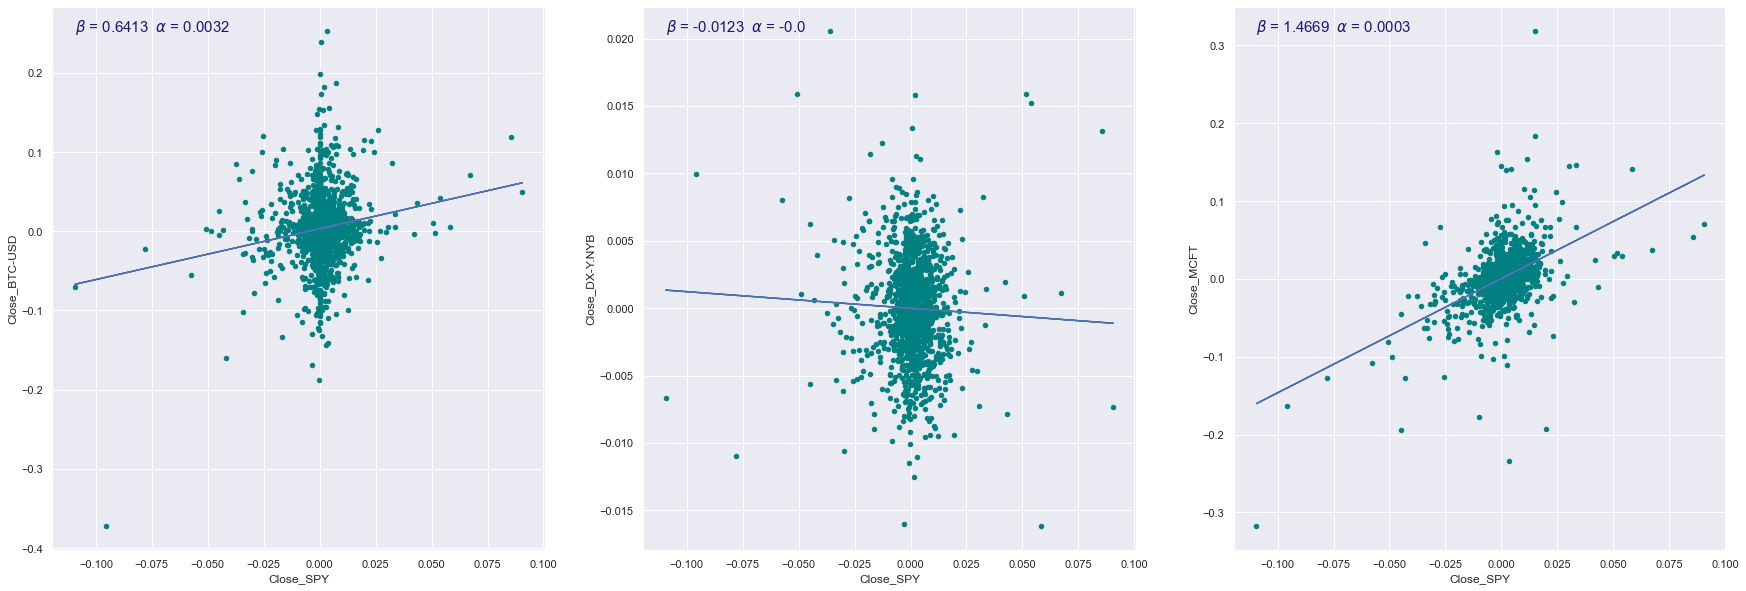

In [110]:
returns_df.dropna(how='all',inplace=True)
stocks = [col for col in returns_df.columns.values if col!='Close_SPY']
fig = plt.figure(figsize=(30,5))
axs = {'ax'+str(i+1):fig.add_subplot(1,len(stocks),i+1) for i in range(len(stocks))}
for i,col in enumerate(stocks):
    beta,alpha = np.polyfit(returns_df['Close_SPY'],returns_df[col],1)
    returns_df.plot(kind='scatter',ax=axs['ax'+str(i+1)],x='Close_SPY',
                   y=col,color='teal',figsize=(30,10))
    axs['ax'+str(i+1)].plot(returns_df['Close_SPY'],returns_df['Close_SPY']*beta+alpha)
    axs['ax'+str(i+1)].text(returns_df['Close_SPY'].min(),
                            returns_df[col].max(),r'$\beta$ = {}  $\alpha$ = {}'.format(round(beta,4),round(alpha,4)),
                           fontsize=15,color='midnightblue')
    

One important feature of the regression line drawn above is that it's slope represents the lienar relation between the stocks, and it is known as the $\beta$. It represents how much it is expected that an unitary change in the market (usualy lays in the $x$ axis) will be reflected in the returns of the stock in the $y$ axis. 

So for example, if $\beta=2$ it means that if the returns in the market increase 1%, then the expected returns of the stock in the $y$ axis will increase 2%. 

The point where the regression line intesects the $y$ axis is known as $\alpha$, and it represents how well on average the stock is doing in relation to the market, where negative values, the stock is doing worst and positive values means the stock is doing better. 

It is important to differeciate the slope and correlation. The correlation means how tightly the points of the scatter plot above feat the regression line, where as the slope simply is the slope of the regression line. 

In [105]:
returns_df.corr('spearman')

,Close_SPY,Close_BTC-USD,Close_DX-Y.NYB,Close_MCFT
Close_SPY,1.000000,0.070552,-0.013972,0.381997
Close_BTC-USD,0.070552,1.000000,-0.045934,0.013065
Close_DX-Y.NYB,-0.013972,-0.045934,1.000000,0.052039
Close_MCFT,0.381997,0.013065,0.052039,1.000000


An important use for kurtosis is to evaluate the assumptions of normality in the distribution of returns, which if often used in finance. This is crucial, because assuming normality when in fact there isn't could lead to a gross underestimation of risk, due to the higher frequency of extreme values in the distribution (in case of a very positive kurtosis value). 

## Sharpe Ratio and Other Portfolio Statistics
***

Now we'll see some important statistics for portfolios, instead on just focusing on individual stocks. We define a **portfolio** as an alocation of funds to a set of stocks. We assume that the weights of the assets in the portfolio sum to one. 

### Daily Portfolio Values
To calculate the daily portfolio value we follow these steps:

1. Extract the prices of the stocks that compose the portfolio
2. Normalize the prices with respect to a time window
3. Multiply the time series by the weights
4. Find the total value for each observation point

In [1]:
from financial_data import *
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.style.use('seaborn-darkgrid')

In [2]:
fd = FinancialData(['SPY','XOM','GOOG','GLD'],period='5y')
prices = fd.prepare_data(fillna=False)

[*********************100%***********************]  4 of 4 completed


In [3]:
def normalize_prices(prices,start_date,end_date,tickers=[],column='Close'):
    '''This function normalizes prices according to the dates provides, slicing the
    information from the start date to the end date
    INPUTS:
        prices (Pandas Data frame): dataframe with the time series of prices
        column (string): the information of the column to be normalized
        start_date (string): the start date, which serves as the normalization
            denominator
        end_date (string): the end date of the period to be analized
    
    OUTPUTS:
        norm_prices (Pandas Data frame): dataframe with the normalized price data
    '''
    columns = [column+'_'+ticker for ticker in tickers]
    norm_prices = prices.loc[start_date:end_date,columns]/prices.loc[start_date,columns]
    return norm_prices

def get_portfolio_values(prices,start_date,end_date,weights,tickers=[],column='Close'):
    """This function returns the daily portfolio values
    INPUTS:
        prices (Pandas Data frame): dataframe with the time series of prices
        column (string): the information of the column to be normalized
        start_date (string): the start date, which serves as the normalization
            denominator
        end_date (string): the end date of the period to be analized
        weights (list): list of same length of tickers, with the weight of each 
            asset
        tickers (list): list with the tickers of the portfolio
    
    OUTPUTS:
        portfolio_values (pandas dataframe): dataframe with the daily values of the
            protfolio
    """
    norm_prices = normalize_prices(prices,start_date,end_date,tickers,column)
    portfolio_values = norm_prices*weights
    portfolio_values['Total'] = portfolio_values.sum(axis=1)
    return portfolio_values

In [4]:
fd.get_tickers()

['SPY', 'XOM', 'GOOG', 'GLD']

In [5]:
weights = [0.2,0.2,0.4,0.2]
(normalize_prices(prices,'2016-03-28','2021-01-02',fd.get_tickers())*weights).sum()

Close_SPY     337.427505
Close_XOM     226.445565
Close_GOOG    726.180874
Close_GLD     272.989197
dtype: float64

<AxesSubplot:xlabel='Date'>

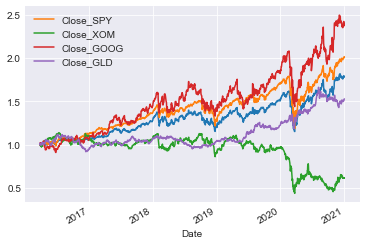

In [6]:
ax = get_portfolio_values(prices,'2016-03-28','2021-01-02',weights,fd.get_tickers())['Total'].plot()
normalize_prices(prices,'2016-03-28','2021-01-02',fd.get_tickers()).plot(ax=ax)

In [7]:
tickers = ['SPY','XOM','GOOG','GLD']
weights = [0.4,0.1,0.4,0.1]
portfolio = Portfolio(tickers,'5y',weights)

[*********************100%***********************]  4 of 4 completed


### Sharpe Ratio
Sharpe ratio is a metric that adjusts the return by risk. This tells us, all else being equal, that:
+ lower risk is better
+ higher return is better

The Sharpe Ratio also considers the **risk free rate of return**, which is the rate of return of an asset free is risk, such as a Treasury Bill. It's formula is:

$$\text{Sharpe Ratio} = \frac{R_p-R_f}{\sigma_p}$$

where $R_p$ is the return of the portfolio, $R_f$ is the risk free rate of return, and $\sigma_p$ is the standard deviation of the returns of the portfolio, which is a proxy of the risk associated to the portfolio.

To compute this metric we use:
$$R_p-R_f = E[R_p-R_f]  = \mu_{R_p-R_f}$$

$$\sigma_p= std(R_p-R_f)$$

To obtain the risk free rate you could use the LIBOR, the 3-month treasury bill rate or 0%. If you have an annualized rate, to convert it into a daily rate you should use:

$$r_{daily} = (1+r_{anual})^{1/252}-1$$

The Sharpe Ratio was designed with an anual basis in mind. To adjust it into other periodicities, you should use :

$$SR_{adjusted}=SR*k$$

where $k=\sqrt{\text{# yearly frequency of observation}}$, so for a daily basis you have $k=\sqrt{252}$.

## Optimizers: Building a Parameterized Model
***
The optimizers maximize or minimize functions, generally using gradient descent. `scipy` has a module of optmizers, where you pass a function, and a guess where you think the optimum is. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import scipy.optimize as spo
mlp.style.use('seaborn-darkgrid')

In [12]:
def f(X):
    """Given a scalar X, return some value (a real number)"""
    Y = (X-1.5)**2+0.5
    print("X = {}, Y = {}".format(X,Y))
    return Y

def test_run():
    Xguess = 2.0
    min_result = spo.minimize(f,Xguess,method='SLSQP',options={'disp':True})
    print("Minima found at:")
    print("X = {}, Y = {}".format(min_result.x,min_result.fun))
    
    Xplot = np.linspace(0.5,2.5,21)
    Yplot = f(Xplot)
    fig = plt.figure(figsize=(10,5))
    plt.plot(Xplot,Yplot,color='teal')
    plt.plot(min_result.x,min_result.fun, 'ro')
    plt.title("Mininma of an objective function")
    plt.show()

The methods attribute refers to a specific optimizer algorithm.

X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.5]
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = [0.5]
X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


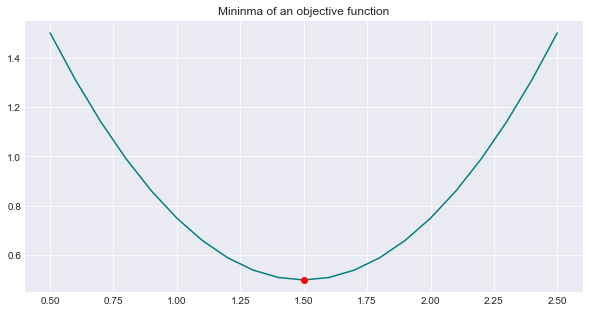

In [13]:
test_run()

A classic problem that optmizers tackle are the convex problems. The definition of a convex function is: a real-valued function $f(x)$ defined on an interval is called **convex** if the line segment between any two points on the graph of the function lies above the graph. 

Now, if we have a parametrized model, such a linear regression, we must find a function to minimize:

In [14]:
def error(line, data):
    """Compute error between given line model and obesrved data.
    
    INPUTS:
    ------
    line: tuple/list/array (C0,C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point (x,y)
    
    OUPUTS:
    -------
    e: returns arror as a single real value.
    """
    
    # Metric: Sum of squared Y-axis differences
    e = np.sum(np.power(data[:,1]-(line[0]*data[:,0]+line[1]),2))
    return e

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully    (Exit mode 0)
            Current function value: 181.11742181698918
            Iterations: 5
            Function evaluations: 19
            Gradient evaluations: 5
Fitted line: C0 = 4.225120681198813, C1 = 1.7600230278926403


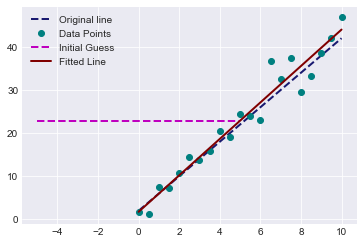

In [17]:
def fit_line(data, erroc_func):
    """Fit a line to given data, using supplied error function.
    
    Inputs:
    -------
    data: 2D array where each row is point (x,y)
    error_func: function that computes the error between a line and observed data
    
    Outputs:
    --------
    (c0,c1): tuple with the slope c0 and the intercept c1 of the line
    """
    l = np.float32([0,np.mean(data[:,1])]) # guess of slope = 0 and intercept = mean(data)
    
    # Plot initial guess 
    x_ends = np.float32([-5,5])
    plt.plot(x_ends,l[0]*x_ends+l[1],'m--',linewidth=2.0, label = "Initial Guess")
    
    # Call the optimizer to minimize the error function
    result = spo.minimize(erroc_func,l,args=(data,),method='SLSQP',options={'disp':True})
    return result.x


def test_run():
    # Define original line
    l_orig = np.float32([4,2])
    print("Original line: C0 = {}, C1 = {}".format(l_orig[0],l_orig[1]))
    Xorig = np.linspace(0,10,21)
    Yorig = l_orig[0]*Xorig+l_orig[1]
    plt.plot(Xorig,Yorig,'--',linewidth=2,label='Original line',color='midnightblue')
    
    # Generate noisy data points
    noise_sigma = 3
    noise = np.random.normal(0,noise_sigma,Yorig.shape)
    data = np.array([Xorig,Yorig+noise]).T
    plt.plot(data[:,0],data[:,1],'o',color='teal',label='Data Points')
    
    # Try to fit a line to thi data
    l_fit = fit_line(data,error)
    print("Fitted line: C0 = {}, C1 = {}".format(l_fit[0],l_fit[1]))
    plt.plot(data[:,0],l_fit[0]*data[:,0]+l_fit[1],color='maroon',linewidth=2,
             label='Fitted Line')
    plt.legend()
test_run()
    

### Portfolio Optimization
Given a set of assets and a time period, find an allocation of funds to assets that maximizes performance. The performance could be measured in many ways: cumulative return, risk, or risk adjusted return (Sharpe ratio).

First, let's frame the problem. To optimize we need:

1. Function to be optimized $f(x)$, in this case the negative Sharpe Ratio minimization
2. Provide an initial guess for $x$
3. Call the optimizer

We should set ranges and contraints. First, the limits for the weights should be that

$$ \sum_i^Kw_i = 1$$

where $w_i$ is the weight for the asset $i$ and $K$ is the portfolio number of assets. 



In [87]:
def get_sharpe_ratio(weights,portfolio_returns,rfr=0):
    p_returns = (portfolio_returns*weights).sum(axis=1)
    std = p_returns.std()
    sharpe_ratio = (p_returns-rfr).mean()/std
    return -sharpe_ratio

def optimize_portfolio(guess_weights=None,portfolio_returns=None,rfr=0):
    if guess_weights==None:
        guess_weigths = np.array([1/portfolio_returns.shape[1] for i in range(portfolio_returns.shape[1])])
    else:
        guess_weights = np.array(guess_weights)
    bounds =  [(0,1) for i in range(len(guess_weights))]
    weights_sum_to_1 = {'type':'eq','fun': lambda weights:np.sum(weights)-1}
    
    weights = spo.minimize(get_sharpe_ratio,guess_weights,args=(portfolio_returns,rfr,),
                           method='SLSQP',options={'disp':True},bounds=bounds,
                          constraints=(weights_sum_to_1))
    return weights.x


In [88]:
weights = [1/returns.iloc[:,:-1].shape[1] for i in range(returns.iloc[:,:-1].shape[1])]
get_sharpe_ratio(weights,returns.iloc[:,:-1])

-0.060616140758315604

In [89]:
 returns.loc[:,returns.columns.values[:-1]]

,Close_GOOG,Close_AAPL,Close_GLD,Close_XOM
Date,,,,
2016-03-30,0.007734,0.017459,-0.013978,-0.000118
2016-03-31,-0.007435,-0.005203,0.004611,-0.011003
2016-04-01,0.006658,0.009175,-0.006035,-0.007537
2016-04-04,-0.006161,0.010274,-0.006671,0.002411
2016-04-05,-0.010050,-0.011789,0.013000,-0.011424
...,...,...,...,...
2021-03-23,0.007049,-0.006889,-0.007301,-0.012341
2021-03-24,-0.003848,-0.019994,0.003461,0.020282
2021-03-25,-0.000342,0.004164,-0.003634,-0.002840


In [97]:
w_opti = optimize_portfolio(weights,portfolio_returns = returns.loc[:,returns.columns.values[:-1]],rfr=0)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.08146435334637109
            Iterations: 12
            Function evaluations: 60
            Gradient evaluations: 12


In [1]:
from financial_data import *


In [2]:
weights = [0.25,0.25,0.25,0.25]
portfolio = Portfolio(['GOOG','AAPL','GLD','XOM'],period='5y',weights=weights)


[*********************100%***********************]  4 of 4 completed


In [3]:
portfolio.optimize_portfolio()

4


array([0.09719233, 0.44019727, 0.46261039, 0.        ])

<AxesSubplot:xlabel='Date'>

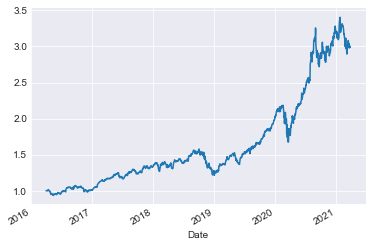

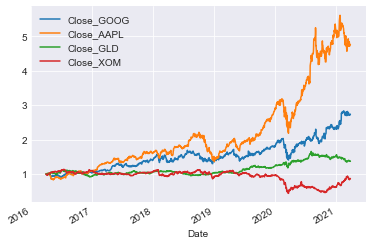

In [4]:
portfolio.get_portfolio_values()['Portfolio'].plot()
portfolio.normalize_prices().plot()

In [5]:
portfolio.get_sharpe_ratio()

0.08139281626897596

***
***

# Course 2: *Computational Investing*

## So you want to to be a hedge fund manager?
***
There are mainly three types of funds:
1. Exchange Traded Funds (ETFs): they behave similar as as stock, where you can buy and sell them. They represent baskets of assets (stocks, bonds, commodities futures, etc). They are very transparent in their composition, and also very liquid. 

2. Mutual funds: they have a clear target or objective (*e.g.* follow the S&P 500), but you can only trade participation in the mutual fund at the end of day. The disclosure is quarterly, hence are less transparent than the ETFs.

3. Hedge funds: to buy into a hedge fund you usualy enter a secret agreement, and is usualy difficult to exit a hedge fund (the agreermet usualy specifies a permanence period before you can exit the fund). This is the less transparent type of fund, they don't have to diclose their holdings, hence are almost not transparent. 

The tickers of Mutual Funds usualy have 5 letters, while the tickers from ETFs usualy have 3-4 letters. 

### Incentives for Fund Managers
An important aspect of the incentives for fund managers is the compensation scheme, which usually depends on the Assets Under Management (the value of the assets managed by the fund manager).

The managers of an ETF are compansated according to an expense ratio, which is simple a porcentage of the AUM (usualy 0.01% 1bps to 1% 100 bps).

Mutual fund managers are usualy also compensated by an expense ratio usualy from 50 bps- 300 bps. This increase in the compensation is argued because of the higher degree of skill required to manage a mutual fund in relation to an ETF. 

Hedge funds are a completely different breed, where the rule of compensation is "*two and twenty*", which means 2% of the AUM and 20% of the profits. Nowdays this compensation method has lowered, usualy to one and ten (eventhough there are some funds which charge higher). 

### How funds attract investors?
There are three types of investors:
+ Individuals
+ Institutions
+ Funds of funds

The reasons inverstors would choose one fund over others are:

+ Track record: how has the fund behave in the past (this is under the hypothesis that a good track record implies a good performance in the future)
+ Simulation + Story: if you don't have yet a track record to show, you could back test your strategy, simulating what would have happened if you had implemented your strategy in the past. This simulation usualy is accomanied by a compeling story backing the strategy. 
+ Good portfolio fit

### Hedge fund goals and metrics
The goals of a hedge fund usualy go beyond making money. They usualy are related to beating a benchmark (*e.g.* beat the S&P 500 Index), and absolute return which is about providing positive returns no matter what (this involves using both long and short positions, and have relatively lower drawdowns).

The metrics to evaluate these goals are:
+ Cumulative return
+ Volatility
+ Risk/reward (Sharpe Ratio)

### The computing inside a hedge fund
Hedge funds are some of the most computational demanding places, where you need a great amount of computational power, a broad band conection, and low latency. 

![](i/1.PNG)

In this example we see we have a live portfolio, whose values are moving in the market, and your trading algorithm is trying to match that live portfolio to a target portfolio (taking into account how much of certain stocks to trade to don't disturb to much the market). To do this, the trading algorithm issues orders, according to the execution protocols. Then, the live portfolio is updated.

Here is how we arrive to the target porfolio:

![](i/2.PNG)

From somewhere, usualy machine learning algorithms, we get a N-day forecast for the assets we're interested in, which drives where our target portfolio should be today. The portfolio optimizer works to balance the risk and rewards seen in the forecasts.

![](i/3.PNG)



## Market Mechanics
***

### Orders and Order Book
The way you build a portfolio is by issuing orders, which usualy are received by a stock broker, and they take care of executing it for you. The order is composed by:
+ Buy or sell
+ Symbol
+ \# shares
+ Limit or market: market means that you're willing to accept the best price the market is currently bearing. A limit price means you don't want to do worst than a certain limit
+ Price: this is only included if you put a limit order. 

$$BUY,IBM,100,LIMIT,99.95$$
$$SELL,GOOG,150,MARKET$$

This orders get registered in the **order book**, which chronologicaly arranges the orders of buy (Bid) and sell (Ask), with the Bid and Ask limit prices. Once there are matches (following the order of the book), the different orders get cleared. So, if you have an early Ask of 1000 share for USD 100, and there arrives an order to buy to market 100 shares, then 100 shares are cleared at USD 100. 

On the other hand, if you have a Bit of 100 shares at 99.95, another Bid of 50 shares at 99.90 and another Bid at 99.85, and a sell order of 175 shares at market arrives, the seller gets 100 shares at USD 99.95, 50 at USD 99.90 and 25 at 99.85. 

The presure of an increase or decrease in prices will result of the volumnes in teh Bid and Ask ends of the trades, and how is the behavior of them in the order book. 

### How orders get to the exchange
The order process starts with the order originator (let's say, you, in your laptop). The order goes to the broker through the internet, who is connected to different exchanges (*e.g.* NYSE, NASDAQ, BATS). In each exchange there is an order book, which are queried by the broker, who makes the order to the exchange who has the best price. 

![](i/4.PNG)

Once the order enters the designated exchage, you the user receive a confirmation in your laptop. Other case scenario is where the broker receives the two legs of the trade and can clear it within his clients, so no exchange is needed. However, this operation should have the best prices that could be given in either of the exchanges, and finally is registered in the exchange which houses the security traded. 

![](i/5.PNG)

Another case scenario is where there are two brokers and two clients in opposite ends of the trade. Here a new entity, called **dark pool**, acts as the intermediate between both brokerages and exchanges. The dark pool is looking at the order books of the exchanges and makes predictions about the direction that prices will take. They usually pay brokerages for the privilege to see the information of the orders before they go to the exchanges, and if they see an advantageous trade they take it and the trade never goes to the exchanges. This is said to be good because in the dark pools the clients make at least the same as they would in an exchange, but there is no need to pay the fees to the exchanges. 

![](i/6.PNG)

### How hedge funds exploit market mechanics
Let's say you're in Seatle, and send a buy order through *e-trade*. This order stops in Atlanta and then travels to New York (where the exchange is located). There, the NYSE order book is visible to you an to colocated high frequency hedge fund traders. This advantageus location translate to a 0.3 microseconds response time to send and receive information of the NYSE. 

So here is the order book exploit:
1. The HF observes the order book, and sees a signal that other traders see also, but with a delay (of miliseconds)
2. The HF follows the signal, which arrives faster than the order of other trades.
3. When your order finally arrives to the exchange, the HF sells the stocks it has just bought to you for a miniscule markup. So, in very few miliseconds the HF has make a profit (evethough it is very little). 

![](i/7.png)

Another way to exploit market mechanics is the geographic arbitrage exploit. In this case you have a HF with a coloced computers in both exchanges (which are separated geographicaly). Because of the distance, prices may vary up or down. The HF looks at both order books, and when an oportunity arises, for example, it finds a higher price in London than in New York, it immediately buys in NY and sells in London. This sort of differences rarely arise, because there are many actors focused on taking advantage of these opportunities. 

### Additiona order types
There are different order types than buy, sell, market and limit (these are the only types exchanges execute). The other types of orders are implemented by your broker, and are executed once the conditions you specified are met, moment when the broker sends the order to the market accordingly. 

+ Stop loss: when the security falls to a certain price, sell it
+ Stop gain: when a security reaches certain price, sell it 
+ Trailing stop: is a convination of the two above, but it changes automatically the value for when the criteria is met. 
+ Sell short: take a negative position, which is used when you think the price of a stock is going down. You basically sell stock that you don't own. 


### Mechanics of short selling: Entry
You think the value of an asset will drop, and you go to your broker and take a short position in that asset (let's say IBM stocks). The, your broker, who manages or owns those shares lend them to you for a certain price, at a certain rate for a certain amount of time. You have a contractual obligation of giving back the shares as the contract specifies.

Then you go to the market (through a broker) and sell those shares at the current price. Now, you have an amount of money product of selling the shares in the exchange, but owe the shares to your broker. Now, you must wait and buy back the shares at the market price. If it indeed went down, you will make a profit because you sold the shares at a higher price than the buy back one when you returned them. 

If the price rises, now you loose money, because you have to buy back the shares at a higher price, where the difference will be the loss per share. The broker takes care of all these dealings.

## What is a company worth?
***

### Why company value matters
The fundamental aspect of stock trading is buying low and selling high. To determine whether the price is high of low you have to know the "true" value of a company to determine if the stock price is high or low. When the stock price is relatively high in relation with the "true" value, then it is an oportunity to sell, and when the opposite happens, you should buy. 

There are many ways to estimate the true value of a company. We'll see three of them:
1. Intrinsic value: value estimated by the future dividends of the company
2. Book value: value estimated according to the book value of their assets
3. Market cap: value of $\text{# standing shares}\times price$

### The value of a future dollar
How much do you value the promise of a future dollar in a year right now? It is more valuable than haven the dollar right now? Having the dollar today is better than the promise of having a dollar in the future, because you can spend it right now. To know the relation between both we use:

$$PV = \frac{FV}{(1+r)^i} \tag{Present Value}$$

where $PV$ is the present value $FV$ the future value, $r$ is the interest rate and $i$ is the amount of time to deliver the promise. 

Another important factor is the risk associated to the promise of the future payment. A higher rist should yield a higher interest rate. This the denominator is associated to the risk factor: the risker the higher it should discount:

$$DF = \frac{1}{(1+r)^i} \tag{Discount Factor}$$



### Intrinsic value
What we saw with the dollar also applies to stocks. But, instead of receiving one payment in the future, you receive dividends for perpetuity (while the company or you exist). Thus, the appropriate way to measure the present value of a stock, given the infinate payments (assuming the future dividends are constant) is:

$$p_t = \sum_{i=1}^{\infty}\frac{dividend (FV)}{(1+r)^i}=\frac{FV}{1+r-1}=\frac{FV}{r}$$

### Book value
A classig definition of book value is total assets minus intangible assets and liabilities

### Market capitalization 
$$\text{market cap} = \text{# shares} \times price$$

The new information affects the stock price because the stock price is the primary way that the investors have to reflect their outlook about the company's future. So, if there is positive (negative) new for the outlook of the company, then the investors will have higher (lower) expectations of future returns, making the stock price rise (fall).

An important thing to keep in mind is that the book value is the lowest price you should consider, because if the market capitalization of the company goes below that, a predatory buyer could buy the whole company and sell it by it's parts to book value, profiting. An other important thing to consider is that, when the intrinsic value is very low in relation to the market capitalization, you should sell the stock, because it may be overvalued. On the other hand, if dividends are going up, and market capitalization is low, you could use this oportunity to buy the stock.

## Capital Asset Pricing Model (CAPM)
***

### Definition of a portfolio
A portfolio is a weighted set of assets, where the sum of the absolute values of the portfolio is 1 (this means that you can have negative allocations to assets, that is, having a short position on them). 

$$R_p = \sum_{i=1}^Nw_i*R_i \tag{Return of Portfolio}$$

where $w_i$ is the weight of the asset $i$ and $R_i$ is the return of that asset. 



### Market Portfolio
The market portfolio is a key element for the Capital Asset Pricing Model. It usualy refers to an index that covers a large set of stocks (*e.g.* S&P500). Most of the important indexes are cap weighted, that is, the stocks are weighted by their market capitalization value. Thus to get the weight for a stock you compute its market cap and divided it by all the sum of market cap:

$$w_i = \frac{\text{mkt cap}_i}{\sum_j\text{mkt cap}j}$$

Each index can be divided into sectors (*e.g.* energy, technology, manufacturing, finance, etc.). Thus, new information can have asymetric effect over the different sectors. 



### CAPM Equation
$$r_i(t)=\underbrace{\beta_ir_m(t)}_{market}+\underbrace{\alpha_i(t)}_{residual}$$

In the most important equation of the CAPM we see that the return of an asset $r_i$ is equal to a $\beta_i$ times the return of the market $r_t$ at that moment, plus an $\alpha$. The extent of how much the movements in the market affect the particular asset is encapsulated in teh $\beta_i$, where the most common value for it is near 1.

An important part of the CAPM is that $E[\alpha_i(t)]=0$, which means it is a random variable with mean 0. We get $\beta, \alpha$ from daily returns, and we compute a linear regression of all the return points to determine both parameters

![](i/8.png)

### CAPM vs Active Management
There is an important debate between passive investing and active investing that resulted from the findings of the CAPM. First, we have:

+ Passive: buy index and hold
+ Active: pick stocks (determine you own weights and compositions). 

Both passive managers and active managers agree on the first term of the CAPM equation, where there is clear that the market drives a great proportion of the behavior of the stocks. They differ in the treatment of $\alpha$: the CAPM says it is a random variable with expected value 0. Active managers believe they can predict $\alpha$, which means that they can pick the stocks that will perform better than the market to go long on them, or worst performers to go short on them. 

### CAPM for portfolios

$$r_p = \sum_{i=1}^Nw_i(\beta_i r_m(t)+\alpha_i(t))$$

we can compute the $\beta$ for the entire portfolio by using: $\beta_p=\sum_iw_i\beta_i$, so we have:

$$r_p(t) = \beta_p r_m(t)+\alpha_p(t)$$

According to the CAPM the $E[\alpha_p]=0$, while for the active managers it will be the weighted sum of the individual asset $\alpha_p=\sum w_i*\alpha_i$

### Implications of CAPM

Because of $E[\alpha_p]=0$, the only way to beat the market is to choose $\beta$, high for rallying markets and low or negative for down markets. The problem with this is that, according to the Efficient Markets Hypothesis (EMH), you can't predict the market. Hence, you can't beat the market consistenly according to the CAPM and EMH. 

### Arbitrage Princing Theory
Stephen Ross (1976) proposed that it is better to understan the different $\beta s$ of an asset in relation with each sector, thus, we could have ($f:finance,t: technology,m:manufacturing$):

$$ r_i = \beta_{i,f}r_f+\beta_{i,t}r_t+\beta_{i,m}r_m+...+\alpha_i$$

## How hedge funds use the CAPM
***
The typical hedge fund developt techniques to find stocks they think will perform well. The informational edge that the're seeking is usually market relative, meaining they're looking for stocks that will go up more than the market, if the market goes up. Or stocks that go down less than the market if the market goes down.

Hedge funds estimate the $\alpha s$ with information they have and using models (may be machine learning models).

![](i/9.png)

in this case we have $w_A=0.5,w_B=0.5,\beta_A=1,\beta_B=2,\alpha_A=1\%,alpha_B=-1%$:

$$ r_p = -0.5r_m+1$$

which, even if our estimation of $\alpha s$ is accurate means we can lose money. This is because we depend on the market direction in the future, and we don't control that component. Is there a way to eliminate the first term?
$$\beta_p = 0 = w_A\beta_A+w_B\beta_B$$
$$abs(w_A\beta_A)+abs(w_B\beta_B) = 1$$
$$w_a=\frac{2}{3},w_b=-\frac{1}{3}$$

which means that our portfolio will return:
$$r_p = w_A*\alpha_A+w_B*\alpha_B=1%$$

with the cabeat that the $\alpha s$ may not be correctly estimated

## Technical Analysis
***
Technical analysis doesn't care about the value of a company, instead it tries to find patterns or trends in the assets prices. It generally focuses in the historical price and volume. Here we look back to this historical data to compute statistics called indicators. This indicators are heuristics that signal whether to buy or sell some asset. 

This is a controvertail approach to investing, because it doesn't look at the fundamental data of a company. Instead you could see this as a tool for trading, understanding that there is important information in the historical prices and that heuristics usualy work in machine learning exercises. 

### When is technical analysis effective
+ Individual indicators by themselves are weakly predictive
+ Combingin multiple indicators is a stronger approach
+ They're important when you're looking for contrast (stock vs stock or stock vs market)
+ Works better over shorter time periods

![](i/10.png)

### A few good indicators
+ Momentum: it looks for a time window how much the price of an asset has changed. It is estimated as:
$$Momenmutm_t = \frac{price_t}{price_{t-n}}-1$$
    
    where $n$ determined the window in which the momentum is computed. 
    
+ Simple moving average (SMA): we calculate the average of the prices for a time window. This lags the movement of the undelying stock price. Technichians look at important events when the moving average and the price cross each other, specially if the moving average is over many days. This is usually combined with the momnetum indicator, where a crossing point, with a high momentum value indicates an oportunity to buy (if it goes upwards) or sell (when it starts going downwards. SMA is also used as a proxy for underlying value, so that big differences between SMA and the current price is an indication to buy (if the price is less than the SMA) or sell if the price is higher than the SMA. Thus we have:

$$SMA_t = \frac{price_t}{\frac{1}{n}\sum_i^nprice_{t-i}}-1$$

    thus, for positive values, where the current price is greater than the moving average, we see a signamto sell, while a negative value is an oportunity to buy.
    
+ Bollinger Bands (BB): as a traiding trigger, to avoid chasing each difference in the SMA, we create a pair of bands that will grow or shrink depending on the volatility of the moment. This is done by  $\pm 2\sigma$ to the moving average. A signal is when the prices goes out of the BB, if it is upwards is a sell signal, under the assumption that it will return to the moving average; and a buy signal when the current price is under the lower boolinger band.

$$BB_t=\frac{price_t-SMA_t}{2std_t}$$

    this value usualy will be between $-1,1$ but when it pierces back from a value higher than 1 it is a sell signal and -1 a buy signal
![](i/11.png)

### Normalization
Because the three factors we saw above range generally in different values, the BB could overwhelm the other two. So we need to take them to a similar space, using normalization:
$$Nomalized = \frac{values-mean}{std}$$

which will return values ranging from $[-1,1]$ with mean 0.

## Dealing with Data
***


### How data is aggregated
What happens in the market is that many many trades are happening in many exchanges, so how is all this data combined and how it is aggregated so we can use it? The finest resulution of data is called a *tick*, which represents a successful buy-sell match or a successful transaction in each exchange.

Due to the huge amount of data that can result from a tick analyzis, data is consolidated in minute-by-minute or hour-by-hour chunks, an represent all that data as *opent, high, low, close and volumne*. The open is the first transaction over the time period, and the close the last; high refers to the highest price transaction and low to the lowest; volumne refers to the total volume transacted. On the data feeds this could be the result for multiple or just one exchange.  

### Price anomaly
Some times you'll see sudden drops in the prices of a stock followed by a increase in value. This is due to stock splits, where one stock is divided into multiple stocks. So, for example, if you had 1 IBM USD300 stock, and it is split into 3, now you'll have 3 USD 100 stocks, with equal total value but a huge drop in the stock price. 

### Stock splits
The most common reason for a stock split is that the price is too high. This may be a problem because people like to buy stocks in batches, and options usualy refer to batches of 100 shares, making them very expensive and less liquid. So, to solve this drop in liquidity, companies need to drop the price of stocks.

These sudden drops could be missinterpreted by the machine learning algorithms, thus you mus t account for all the splits. A solution to this problem is the adjusted close, that accounts for all these changes so that we have a better view of the real historical behavior of the value of a company.

How this works is that, for the last observed price both the stock's actual close price and the adjusted price are the same, and they continue to be the same until we encouter the first split. If it was a 2:1 split, then we need to divide the whole series backward, which will return the adjusted price for that firt split. If you continue to go backwards and find another split, let's say 4:1, you'll need to divide once again from that moment backwards the series by 4. And so on. 

### Dividends
As we've seen stocks usualy pay annual dividends. Imagine that the value of a stock is USD100, and that it will pay 1% dividend at the end of the period. You should expect that as the dividend payment date approaches, the stock price will converge to USD101, and after the dividend is paid out, the stock's price will drop. We can use this information to our advantage.

We must adjust the historical price for this dividend payments also, so if the dividend payment is 1% the close price will be equal to the adjusted price until the dividend was paid out, and the adjustment is to reduce the close price by the dividend paid. Thus, we should always use adjusted prices.

You need to keep in mind that the adjusted prices will change as times goes on, due to the new dividend payments and stock splits, so the adjusted price for the 2nd of january 2010 will change if you see it in 2015 or 2020. 

### Survivor Bias
One thing we'll be doing is creating trading stratgies and backtesting them. One usual stock universe that's used is the S&P500; if you test your strategy with the stocks that compose the S&P500 today you'll introduce some survivor bias, because the stocks that are on the index today are the ones that could keep their value or increased their value enough to being included into the index. So, if you want to see an unbiased strategy performance you should pick a point in time where you want to do your backtesting, and use your strategy on the stocks that composed that index in that moment in time.

![](i/12.png)

## The Efficient Market Hypothesis (EMH)
***
The EMH makes some important assumptions:
1. There is a large number of investors
2. New information arrives randomly
3. Prices adjust quickly
4. Proces reflect all available infromation



### Where does information come from?
There is a number of places information can come from, let's see some of these:
1. Price/volume: it is public, rapidly available and is the basis for technical analysis
2. Fundamental: it is public, quarterly
3. Exogenous: information about the world that affects the company
4. Company insiders: secret information, it may or not be legal

### Three forms of the Efficient Market Hypothesis
1. Weak: future prices cannot be predicted by analyzing historical prices. Current prices reflect all the information we already know. 
2. Semi-strong: prices adjust rapidly to new public information. You could make money with insider information. 
3. Strong: prices reflect all information public and private

### Is the EMH correct?
If it is correct, many of the things we'll learn will be futile. But there is evidence against the strong and semi-strong form of EMH. 

## The Fundamental Law of Active Portfolio Management
***

### Grinold's fundamental law
In the 1980's Grinold was seeking a method to relate performance, skill and breadth in investing. For this, he developed a relationship he called the Fundamental Law of Active Portfolio Management. 

$$Performance = skill*\sqrt{breadth}$$

Performance is summarized in something called infromation ratio (IR), which refers to the sharpe ratio of excess returns, in other workds the manner in which the portfolio manager is exceeding the market's performance. Skill is summarized in something called information coefficient and breadth is just how many trading opportunities we have. 

### The coin flipping casino
Imagine you're in a casino where you are betting in coinflips. You know that the coins are biased, with a $P_H=0.51$ (that could be thought of as the $\alpha$). Know you have to make a decision on how to bet 1000 tokens given that there are 1000 tables in the casino where you can bet simultaneously. Let's see the two extreme cases:

1. Bet all in one coin flip: in this case you bet all your tokens on a single coinflip, and you get the following:
$$E[return] = 0.51*1000+0.49(-1000)= 20$$
$$std(return) = std(\pm 1000 +0+0+...+0) \approx 31.6$$
$$SR(return) = \frac{E[return]}{std(return)}\approx 0.63$$

2. Bet one coin in each table: in this case you bet only one coin per table:
$$E[return] = 1000* [0.51*1+0.49(-1)]= 20$$
$$ Std(return) \approx 1$$
$$SR(return) = \frac{E[return]}{std(return)}\approx 20$$

Thus, when you compare the risk-adjusted return for both scenarios you can see the great difference, eventhough the expected value for both are the same. 

An important thing to notice is that 

$$SR_{\text{multi bet}} = SR_{\text{single bet}}*\sqrt{\text{# bets}}$$

which has the same form as the Fundamental Law of Active Portfolio Management.

In [4]:
import numpy as np
stds = []
for _ in range(10000):
    choices = np.random.choice([1,-1],1000,p=(.51,.49))
    std = choices.std()
    stds.append(std)
np.mean(stds)

0.9993017333124712

### IR, IC, and breadth
We can re interpret the CAPM formula as:
$$r_p(t)=\underbrace{\beta_pr_m(t)}_{market}+\underbrace{\alpha_p(t)}_{skill}$$
Thus, we have that:
+ Information ratio (IR):
$$IR = \frac{mean(\alpha_p(t))}{std(\alpha_p(t))}$$
+ Information coefficient (IC): is the correlation of forecast to returns
+ Breadth: is the number of trading opportunities you had in a year

***The fundamenta Law***
$$IR=IC\sqrt{BR}$$

## Portfolio Optimization and the Efficient Frontier
***
Suppose you have a set of stocks that you've determined are good investments. How much of your portfolio should you invest in each? There are many potential answers to that question. Here we'll see the approach of mean variance optimization. Here we'll answer, given a set of equities and  a target return, find an allocation to each equity that minimizes risk. 

### What is risk?
We use as a measure of risk the historical volatility in the returns of the stock, which is measured with the standard deviation of the historical daily returns. 

One important thing discovered by H. Markiwitz is that the relationship between stocks in terms of covariance could help to return a portfolio where the performance in terms of risk could be much better than any of the individual assets, and have a high expected return. 

### The importance of covariance
When we are considering a basket of assets to include in our portfolio, an important metric is their covariance. This is crucial in choosing the assets' weights because if you find assets with negative covariance you can end up with a target return but with much lower volatility. 



### Mean Variance Optimization
What Markiwitz added is the importance of accounting for covariance, because a convination of low or even negative covariance assets can result in a lower risk portfolio. 

To compute the mean variance optimizer (MVO), you need as an input the expected return, the volatility, the covariance and the target return. The output of this optimizer are the asset weights for the portfolio that minimizes the risk. 

### The Efficient Frontier
Now considering all the combinations of assets and different return targets, we can get the frontier of all the combinations (weights) that yield the minimum risk given the target return. This frontier is called the **efficient frontier**. 

![](i/13.png)

If we plot the tanget line of the efficiento frontier to the origin we intersect the frointier in the maximum sharpe ratio portfolio. This is used as a technical device, to compare our portfolios with the efficient frontier. 

***
***

# Course 3: *Learning Algorithms for Trading*

## How Machine Learning is Used at a Hedge Fund
***
In general, the focus is on creating a model that can be used to predict future prices for stocks or other assets.

### The Machine Learning Problem
In most cases machine learning algorithms are focused on building a model, which takes some data $X$, runs some process and provides new data $Y$, where $Y$ is a prediction and $X$ is an observation of the world. 

Thus, we need data, which will feed the ML algorithm that will output a model, to then be runned. 

These are the steps to produce a ML model:
1. Select the $X$ variables or factors: could be the historical price data, the P/E, boolinger bands, momentum, etc. 
2. Select the $Y$, which could be future prices, future changes in prices. Both $X,Y$ go into the data set.
3. Define the time period (how far back we'll go) and the stock universe (symbols we'll use to train the model). 
4. Train the model through a ML algorithm (linear regression, kNN, Random Forest, etc). 
5. Precit the values with the model 

### Backtesting
A natural question is how accurate are these forecasts. To start answering this question we roll back time and star testing your model. We allow our system to only look at data at the start of our dataset (which is chronologicaly ordered). Once we've trained our algorithm, we create a forecast which is the basis for the orders.  

We pick that orders and simulate what would have happened if we executed them in the past. Then we train over a new set of data, make new forcast and send a new batch of orders that will continue the simulation of the performance of the model. 

### Problems with regression
Usualy we find that in the real world performance is not as good as in backtesting. Let's see some of the problems we will encounter when doing our own forecasts.  

+ Our forecast will seem to be noisy and uncertain. 
+ It is hard to know how confident you should be in your forecast. 
+ It is not clear how long you should hold a position that might have arisen from a forecast, and how you should allocate to that position. 

Some of these issues can be addressed using reinforcement learning. Instead of making a forecast of a future price, we had the system learn a policy and the policy tells the system whether to buy or sell a stock. 

## Regression
***

### Parametric Regression
In this approach we represent the model with a set of parameters. The classic solution of this kind of models is a linear regression, which is described by:

$$y = \beta_0+\beta_1 x$$

where the $\beta$ parameters describe the model. If you need a more complex model you could fit a polynomial function:

$$y = \beta_0+\beta_1 x^n+ \beta_2 x^{n-1}+...+\beta_n x$$

where the parameters $\beta$ describe the polynomial function that predicts the values $y$. Here we see the more complex the model, the more parameters will be needed to describe the model. 

### k-Nerarest Neighbor
In a instance-based approach we keep the data and use it when we make a query. Here we get a new instance of the $x$ variables, and find the k-nearest neighbors of that point of $x$, use a function to agregate them (usualy the mean) and find the $y$ value for that new instance, using the previous information we had as the basis. 

![](i/14.png)

### Kernel Regression
Kernel regression is simlar to the kNN algorith, but the key difference is that it weights the neighbors according to the distance between them and the new instance that will be predicted. 

This kind of non parametric models are used for more complex behaviors in the data, which are difficult to represent mathematically. 

### Training and Testing
An important thing to evaluate our models is the out of sample testing, where we use data we didn't use to train the algorithm (because testing over the data we used to train would be easier, given that the model was adjusted with that data). Beacause the data we're using is indexed in time, we split the train and test data accordingly, training in older data and testing in the newest data, to avoid generating some backward looking bias. 

So, with the train data we'll generate the model, and use the test data to generate predictions that will be compared with the real data observed, using a metric to measure the performance of those predictions. 

## Assessing a Learning Algorithm
***
An important different between parametric and non parametric models is that non parametric models doesn't extrapolate very well, because they have to use the closest instances they find. In contrast, parametric models can extrapolate better, because they are defining functional forms, which the data will continue to follow even though the data is outside the dominium where the model was trained.

### Metric 1: RMS Error
We can measure the error by taking each point in the dataset and finding the error (difference between the predicted value vs the observed value), squaring that error, then finding the mean of the squared error, and computing the square root of the mean squared error. 

$$RMSE = \sum_{i=1}^m\sqrt{\frac{(y_{observed}-y_{predicted})^2}{m}}$$

As we know, we can overfit the model and get a very small error on the training data. How ever the most important measure of error is the out of sample RMSE. 

### Roll forward cross validation
Because traditional k-fold cross-validation methods doesn't work well for financial data, due to its temporal nature, we can use a roll forward cross validation. Here our training data is always before our testing data. Here we take different chunks of data, starting with the earliest data, testing in the next chunk of data (let's call it chunk 2), evaluating the model; then taking the chunk 2 as the training data and evaluating on the chunk 3 and so on. 

### Metric 2: Correlation
Another way to test our model is to take the prediction we've made and calculate the correlation with the actual values observed. We can measure this by using :

```python
np.corrcoef()
```



### Overfitting
Overfitting occurs when the in sample error continues to decrease, while the out of sample error stops decreasing or starts increasing.

![](i/15.png)

## Ensemble Learners, Bagging and Boosting
***
Can a set of week learners be combined to create a single,strong learner? This is the core of the ensemble learners of this lection.  

### Ensemble Learners
Creating an ensemble of learners is a way to make the learners you've got better. This is not creating a new algorithm, instead it is about assembling together several different algorithms or models to create an ensemble learner. 

Ensemble learners usually have a lower error than each of the individual learners by themselves. They also produce less overfitting, because due to the idiocincrecies of what information is taken as relevant in each model, the combination results in a less overfitted model. To take advantage of this, you could use different types of model (neural networks, random forests, etc) instead of using different versions of the same model.   

To build an ensemble learner you could use the different predictions of each individual learner and take the mean as the prediction of the ensemble. 

### Bootstrap agreegating or bagging
Another alternative to construct ensemble learners is by training the same type of model, training each model using different sets of data. You do this by dividing randomly (with replacement) the training data into different bags, all with the same amount of instances. A rule of thumb is that each bag should contain the same amount of instances of the training data, but because of the replacement about 60% of the instances in each bag are unique. 



### Boosting
Boosting is a fairly simple variation on bagging that strives to improve the learners by focusing on areas where the system is not performing well. In this case we take the training data and train the model in the usual way. Then we take all the training data and use it to test our model, in order to discover that the problematic instances that are not well predicted. When we build our next bag of data each instance is weighted according to the error of the model with the first bag, which makes more likely to select more problematic instances for the next model, which will have a greater focus on those problematic areas. 

With the errors of the first two models, we once again weight the instances to build the third bag, and so on. 

## Reinforcement Learning
***
Up until this point, we've focused on learners that provide forecast price changes. We then buy or sell the stocks with the most significant predicted price change. This approach ignores some important issues, such as the certainty of the price change. It also doesn't help us know when to exit the position either. 

Reinforcement learners create policies that provide specific direction on which action to take. 

### The Reinforcement Learning Problem
When we say reinforcement learning we're describing a problem and not a solution. There are many algorithms that could be used to solve del RL problem. 

We have a robot that interacts with the environment. The robot's going to take actions that will change the environment, it will sense the environment, reason over what it sees and take another action. This is the sense, think act cycle. Once the robot sense the environment, some form of description of the environment comes in, which is called the state $s$. The robot has to process $s$ to determine what to do; the function that does that is called $\pi$ or policy, which outputs an action $a$. This action $a$ affects the environment some way, changing it. This produces a transition which generates a new state $s_2$. There is another important piece which is called the reward $r$, so everytime the robot is in a particualr state and it takes and action, there is a particular reward associated with taking that ation in that state. That reward comes into the robot, and the robot's objective is to maximize the reward over time. Somewhere inside the robot is an algorithm that takes all the information to figure out what that policy ought to be. 

In terms of trading our environment is the market and our actions are buy, sell, hold. $s$ are factors about our stocks that we might observe and know about, and $r$ is the return we get for making the proper trades. 

![](i/16.png)

### Markov decision problems
What we've working with is called formally a Markov decision problem. This is composed of:
+ A set of states $S$: all the values that $s_i$ can take, which go into the robot
+ A set of actions $A$: the potential actions we can take back into the environment
+ Transition function $T[s,a,s']$: it is a tridimentional object that records in each of its cells the probability that if we're in the state $s$, and take action $a$ we'll end up in state $s'$.
+ Reward function $R[s,a]$: is the function that tells us the reward $r$ we receive if we are on state $s$ and take action $a$. 

The problem is to find the policy $\Pi^*(x)$ that will maximize the reward over time. Two algorithms we could launch  to find this optimal policy are policy iteration and value iteration. If we don't know $T[.], R[.]$ we will not be able to launch these algorithms directly to find the policy. 

### Unknown transitions and rewards
Most of the time we will not have the transition function nor the reward function. So the trader or robot will have to interact with the environment, observe what happens and work with that data to try to build a policy.

Let's say we are in $s_1$ our robot took action $a_1$, we now find ourself in $s'$ and we get reward $r_1$. These are the component of an experience tuple:

$$(s_1,a_1,s'_1,r_1) \tag{Experience tuple}$$

This is similar to the experience typles in supervised learning with $x_1,y_1$. We then are in $s_2=s'_1$ and have 

$$(s_2,a_2,s'_2,r_2)$$
$$...$$

Now that we have this trail fo experience tuples, there are two thing we can do with them in order to find the policy $\Pi(s)$.

+ Model based reinforcement learning: looking the data over time we build the model of $T[s,a,s']$ and we build a model of $R[s,a]$. We then use value or policy iteration to solve the problem.
+ Model-free: model-free methods develop a policy just directly by looking at the data. 

### What to optimize
One important thing to consider when building the reinforcement learning algorithm is the time horizon. If we have an infinite horizon, we'll have:
$$\sum_{i=1}^{\infty}r_i$$

in a finite time horizon we'll have:
$$\sum_{i=1}^{n}r_i$$

If you remember, back when we say the value of money over time, we saw that a dollar now is more valuable than a dollar in one month. We can use the same knowledge and use a discounted reward:
$$\sum_{i=1}^{\infty}\gamma^{i-1}r_i$$

## Q-Learning
***
Q-learning is a model-free approach, meaning that it does not know about or use models of transition $T[]$ or the rewards $R[]$. Instead, Q-learning build a table of utility values as the agint interacts with the world. These Q-values can be used at teach step to select the best action based on what it has learned so far. 

### What is Q?

Q-learning is named after the Q function. Q can be written as a function $Q(s,a)$ or you can think of it as a table. In this class we're going to view Q as a table. It ahs two dimensions, $s,a$. $s$ us the state that we're looking at, and $a$ is the action we migh take. $Q$ represents teh value of taking action $a$ in state $s$, and there is two components to that. There is teh immediate reward for taking action $a$ in state $s$ and the discounted reward, which is the reward for future actions:

$$Q[s,a] = \text{immediate reward}+\text{discounted reward}$$

This means $Q$ isn't greedy. Once we have Q we use it to create the policy:

$$\Pi(s)= argmax_a(Q[s,a])$$

so we are in state $s$, and we want to figure out which action $a$ is the best, so that it produces the maximum total reward. So this $argmax()$ function finds the argument $a$ that maximizes the funtion $Q$. 

### Learning procedure
We start with data, which is chronologically ordered, and thuly separated into trainning and testing sets. We iterate over time, taking a state $s_1$, passing it through the policy function $\Pi(s_1)$, taking an action $a_1$, transitioning to a state $s'_1=s_2$, and computing the reward $r_1$. By this point we have the first experience tuple $(s_1,a_1,s'_1,r_1)$, with which we uptdate our $Q$ table. We repeat this process until convergence (this means until the reward stops improving in the training data). 

We initiallize the $Q$ table with small random values, which is initiallized at the start time. With this $Q$ we will take find the argument $a$ that maximizes $Q$, which will be the action we take for the state $s$. This will lead to an improvement of $Q$ until converges. 

![](i/17.png)

### Update rule
Thhe update rule for our $Q[s,a]$ matrix is:
$$Q'[s,a] = (1-\alpha)Q[s,a]+\alpha* \text{improved estimate}$$

where $\alpha\in [0,1]$ is the learning rate of the algorithm, with an usual value of 0.2. This will determine the velocity of learning of the algorithm. In a more detailed way we have:

$$Q'[s,a] = (1-\alpha)Q[s,a]+\alpha(r+\gamma Q[s',argmax_{a'}(Q[s',a'])])$$

where $\gamma\in [0,1]$ is the discount rate of future rewards, the higher the more you value future rewards. $Q[s',argmax_{a'}(Q[s',a'])]$ is the future reward, given the optimal action that results of the information we have at the moment.

### Two finer points
The success of Q-learning depends on a large extent on the exploration. We need to explore as much of the state and action space as posible. 

One way to do this is with randomness. We start with a high probability of choosing random values, and decrease it as iterations go on. This forces us to explore more diverse options at the begining, but focus on the best actions as the algorithm learns more. 

### The Trading Problem
To implmeent the Q-learning algorithm, we must first define our actions, states and rewards. Let's first look at the actions in teh trading problem.

We just have three actions: buy, sell and do nothing. The most frequent action will be to do nothing. Eventually the algorithm will tell us to buy or to sell:

![](i/18.png)

The returns need to be related to the return of our strategy. WE could use two approaches: short term rewards in terms of daily rewards, or long term rewards that reflect the cumulative return over a trade cycle (either from a sell to a buy, in short positions, or buy to a sell in long). The daily return will converge faster, because each day the algorithm gets a signal of the reward of taking the action it took. While for the cumulative return, the algorithm must infer the correct order of actions until the delayed reward arrives. 

With respect to the state, it is all the important information that can help us generalize, suchg as the ratio adjusted close/SMA, the Bollinger Band value, the P/E ratio, if we're holding a stock, and the return since entry. 

![](i/19.png)

Discretizing is an important step in the proces from converting our factors into integers, that will describe the state. What we do is to divide the instance number by the number of steps we define:

$$stepsize = \frac{size(data)}{step}$$

then we sort the data, and determine the ranges according to the stepsize. 

### Advantages and Issues
The advantages are:
1. It can easuly be applied to domains where all state and/or transitions are not fully defined.
2. As a result, we do not nneed addtional data structures to store transitions or rewards
3. The Q-value for any state-action pair takes into account future rewards. Thus, it encondes both the best possible value of a state as well as the best policy in terms of the action that should be taken. 

The issues are:

1. The rewards often comes in the future -representing that properly requires look-ahead and careful weighting
2. Raking random actions (suchs as trades) just to learn good stragegy is not really feasible (you'll end up losing a lot of money!)


## Dyna
***
One problem with Q-learning is that it takes many experience tuples to converge. This is expensive in terms of interacting with the world, because you have to take a step, in other workds execute a trade, in order to gather information. To address this problems, Dyna was invented.

Dyna works by building models of T, the transition matrix and R, the reward matrix. Then afeter each real interaction with the world, we hallucinate many additional interactions, usually a few hundred, that are used then to update the Q table.

Dyna-Q is an algorithm intended to speed the model convergence for Q-learning (which is a model free as we saw). Dyna ends up becoming a blend of model free and model based methods. Let's see the Q-learn process:

1. Initialize the Q table
2. Observe the environment and obtain $s$
3. Execute $a$, observe the new state$s'$, and compute $r$
4. Update Q with the experience tuple $(s,a,s',r)$

This is done over and over, improving the Q table. In the Dyna what we do is learn a model for $T,R$. For the part where we update our model for $R,T$ we find new values for $T'[s,a,s'],R'[s,a]$. $T$ is the probability that if we are in state $s$ and we take action $a$ will end up in $s'$, and $R$ is our expected reward if we are in state $s$ and we take action $a$.

We then hallucinate (simulate) and experience: we select a random $s$ and a random $a$, then we infer our $s'$ by looking at $T[]$ and we infer our reward $r=R[s,a]$. This yields a complete experience tuple, which we can use to update Q. We can make hundreds of simulation passes before taking new steps in the real world (making another loop if Q-learning). 

![](i/20.png)